# FIRST SETUP

In [2]:
#If pickled start @ Running from Pickle Data Cell!
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import random
from math import pi
from tqdm import tqdm, tqdm_notebook

#for reading the .db file
from sqlalchemy import create_engine

In [25]:
#import our operationalized ethical theories
import ethical.principles as pr

#the classifier file is needed when we need to see what happens step by step
#it is integrated in the ethical.principles file
import ethical.classifier as c

In [26]:
import ipywidgets
ipywidgets.__version__


'8.0.6'

In [27]:
#import our visualizating functions
import ethical.visualizator as viz

In [28]:
#import our voting schemes
import ethical.election as elect

In [29]:
import ethical.evaluation as ev

In [30]:
first_Sesh= False

In [31]:
import os  
    
# Get the current working  
# directory (CWD)  
cwd = os.getcwd()  
    
# Print the current working   
# directory (CWD)  
print("Current working directory:", cwd) 

Current working directory: /home/sietze/Downloads/moral-uncertainty-master


# Moral Machine Database

In [32]:
#Sietze: To generate SQL from CSV file
# Download CSV file from -> https://goo.gl/JXRrBP
# use sqlite3 creating a db called SharedResponses
# E.G.
# .mode csv
# .import SharedResponses.csv
# .import ./SharedResponses.csv SharedResponses (if path of CSV = path of db)
# This should create a usable database for the query below.

In [38]:
#Koji: Sql seemed easy to use, so we converted the .csv file into a .db file
engine = create_engine("sqlite:////"+cwd+"/SharedResponses.db", echo=False)
responses = pd.read_sql("SELECT * FROM SharedResponses ORDER BY RANDOM() LIMIT 200000", con=engine)

In [39]:
#We sample full sessions only, grouped by UserID
sample_size = 100000000
query = """
    SELECT gc.session_count, sr.* FROM SharedResponses sr
    INNER JOIN (
        SELECT ExtendedSessionID, COUNT(DISTINCT ResponseID) AS session_count FROM SharedResponses
        WHERE UserID <> ''
        
        /* Get only full sessions. */
        GROUP BY ExtendedSessionID
            HAVING COUNT(DISTINCT ResponseID) LIKE 13
                AND COUNT(ResponseID) LIKE 26
        
        LIMIT {0:d}
    ) gc
        ON gc.ExtendedSessionID = sr.ExtendedSessionID
    ORDER BY sr.UserID
""".format(sample_size)
df = pd.read_sql(query, con=engine)

In [40]:
#output the possible values for each column
for feature in responses.columns:
    print(feature)
    print(responses[feature].unique())
    print(responses[feature].unique().shape)

ResponseID
['HniK3zgEjLGRPzL33' 'e8bph2KEg6J7hwmBY' 'kvb7JkGvR52JS6ku6' ...
 'THMEd4PTmRKGi6fuw' 'JZLQu5QfL74D2S6JY' 'ShrkbfWBvFsK26L5w']
(199513,)
ExtendedSessionID
['570268086_1906857462' '-1685006673_2642053267934350.0'
 '-2103669073_9535894857923612.0' ... '1527809117_3080309344.0'
 '-241245703_6150078124794454.0' '-1813649142_5525159133356219.0']
(188675,)
UserID
['1906857462' '2642053267934350' '9535894857923610' ... '3080309344'
 '6150078124794450' '5525159133356220']
(188675,)
ScenarioOrder
['13' '7' '12' '10' '11' '3' '8' '9' '2' '1' '6' '4' '5']
(13,)
Intervention
['1' '0']
(2,)
PedPed
['0' '1']
(2,)
Barrier
['0' '1']
(2,)
CrossingSignal
['1' '0' '2']
(3,)
AttributeLevel
['Hoomans' 'Female' 'Less' 'Fat' 'Young' 'Pets' 'More' 'Fit' 'Old' 'Rand'
 'High' 'Male' 'Low']
(13,)
ScenarioTypeStrict
['Species' 'Gender' 'Utilitarian' 'Fitness' 'Age' 'Social Status' 'Random']
(7,)
ScenarioType
['Species' 'Gender' 'Utilitarian' 'Fitness' 'Age' 'Random' 'Social Status']
(7,)
DefaultChoice


In [42]:
#Sietze: Pickle the frame for easy access
#Will store the pickle in the same folder.

df.to_pickle("./sharedresponses.pkl")

## Running from Pickle Data

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import random
from math import pi
from tqdm import tqdm, tqdm_notebook
import ethical.principles as pr
import ethical.classifier as c
import ethical.visualizator as viz
import ethical.election as elect
import ethical.evaluation as ev
from importlib import reload

df = pd.read_pickle("./sharedresponses.pkl")

In [2]:
#Demonstrating some random information
df.head(n=14)

session_count         ResponseID              ExtendedSessionID  \
0              13  C4yoxBdFMTE3tAjEu  1295349308_1000284909295010.0   
1              13  CDnbR339euts3x3c3  1295349308_1000284909295010.0   
2              13  CMChvaNp5QZup4QBw  1295349308_1000284909295010.0   
3              13  CZ3BfpjubdHMdqq6z  1295349308_1000284909295010.0   
4              13  C4yoxBdFMTE3tAjEu  1295349308_1000284909295010.0   
5              13  CDnbR339euts3x3c3  1295349308_1000284909295010.0   
6              13  CMChvaNp5QZup4QBw  1295349308_1000284909295010.0   
7              13  CZ3BfpjubdHMdqq6z  1295349308_1000284909295010.0   
8              13  Kvr4yzcYB8QAxykMg  1295349308_1000284909295010.0   
9              13  P3nEs8eAZDgegGQgL  1295349308_1000284909295010.0   
10             13  XFna5WHLT9rXd37rE  1295349308_1000284909295010.0   
11             13  Kvr4yzcYB8QAxykMg  1295349308_1000284909295010.0   
12             13  P3nEs8eAZDgegGQgL  1295349308_1000284909295010.0   
13             13  XFna5WHLT9rXd37rE  1295349308_1000284909295010.0   

              UserID ScenarioOrder Intervention PedPed Barrier CrossingSignal  \
0   1000284909295010             9            0      0       1              0   
1   1000284909295010             6            0      1       0              0   
2   1000284909295010             2            0      0       1              0   
3   1000284909295010             5            0      1       0              0   
4   1000284909295010             9            1      0       0              0   
5   1000284909295010             6            1      1       0              0   
6   1000284909295010             2            1      0       0              1   
7   1000284909295010             5            1      1       0              0   
8   1000284909295010             8            0      1       0              0   
9   1000284909295010             1            0      1       0              2   
10  1000284909295010            12            0      1       0              1   
11  1000284909295010             8            1      1       0              0   
12  1000284909295010             1            1      1       0              1   
13  1000284909295010            12            1      1       0              2   

   AttributeLevel  ... LargeMan Criminal MaleExecutive FemaleExecutive  \
0             Fat  ...        0        0             0               0   
1            Less  ...        0        0             0               0   
2            Rand  ...        1        0             0               1   
3           Young  ...        0        0             0               0   
4             Fit  ...        0        0             0               0   
5            More  ...        0        0             0               0   
6            Rand  ...        0        1             0               1   
7             Old  ...        0        0             0               0   
8          Female  ...        0        0             0               0   
9            High  ...        0        0             0               0   
10           Pets  ...        0        0             0               0   
11           Male  ...        0        0             0               0   
12            Low  ...        0        0             0               0   
13        Hoomans  ...        0        0             0               0   

   FemaleAthlete MaleAthlete FemaleDoctor MaleDoctor Dog Cat  
0              0           0            0          0   0   0  
1              0           0            1          0   0   0  
2              0           0            0          0   0   0  
3              0           0            0          0   0   0  
4              1           2            0          0   0   0  
5              0           1            2          0   1   0  
6              0           0            0          0   0   0  
7              0           0            0          0   0   0  
8              1           0            0   

In [3]:
#outputs the number of users of the sample
df['UserID'].nunique()

51211

In [4]:
#pairwise comparisons - cf. Noothigattu et al.
df.groupby('UserID')['ResponseID'].nunique().mean()

15.083868700083967

In [5]:
#how many responses in total - did some users answered several times?
df['ResponseID'].nunique()

772460

# Moral Principles

There are 6 moral principles :
- SentientUtilitarianism, save the most lives whether Human or Pets
- ClassicUtilitarianism, save the most human lives
- HedonisticUtilitarianism, save the most longest total life expectancy possible
- AgentCenteredDeontology, or duty ethics, avoid involving others as much as possible
- PatientCenteredDeontology, or rights-based ethics, self-sacrifice over others and if impossible: avoid any actions
- ContractarianDeontology, avoid involving legally crossing pedestrians in priority

If one specific is wanted, just type the type you want as a function pr.'insert_function_name'(df)
If you want full moral profiles, use pr.moral_profile(df)


In [6]:
gP, gA = pr.moral_profile(df)


Moral principle not recognized or not coded yet - returning by_default


0it [00:00, ?it/s]

  0%|          | 0/772460 [00:00<?, ?it/s]

  0%|          | 0/772460 [00:00<?, ?it/s]

  0%|          | 0/772460 [00:00<?, ?it/s]

  0%|          | 0/51211 [00:00<?, ?it/s]

0it [00:00, ?it/s]

  0%|          | 0/772460 [00:00<?, ?it/s]

  0%|          | 0/772460 [00:00<?, ?it/s]

  0%|          | 0/772460 [00:00<?, ?it/s]

  0%|          | 0/51211 [00:00<?, ?it/s]

0it [00:00, ?it/s]

  0%|          | 0/772460 [00:00<?, ?it/s]

  0%|          | 0/772460 [00:00<?, ?it/s]

  0%|          | 0/772460 [00:00<?, ?it/s]

  0%|          | 0/51211 [00:00<?, ?it/s]

0it [00:00, ?it/s]

  0%|          | 0/772460 [00:00<?, ?it/s]

  0%|          | 0/772460 [00:00<?, ?it/s]

  0%|          | 0/772460 [00:00<?, ?it/s]

  0%|          | 0/51211 [00:00<?, ?it/s]

0it [00:00, ?it/s]

  0%|          | 0/772460 [00:00<?, ?it/s]

  0%|          | 0/772460 [00:00<?, ?it/s]

  0%|          | 0/772460 [00:00<?, ?it/s]

  0%|          | 0/51211 [00:00<?, ?it/s]

0it [00:00, ?it/s]

  0%|          | 0/772460 [00:00<?, ?it/s]

  0%|          | 0/772460 [00:00<?, ?it/s]

  0%|          | 0/772460 [00:00<?, ?it/s]

  0%|          | 0/51211 [00:00<?, ?it/s]

In [110]:
reload(pr)

profile1 = pr.moral_profile2(gP, gA)

profile1.head()

#Doesn't show Uncovered_answers in the result here in the head, but it is actually correct.

UserCountry  Uncovered_answers  \
UserID                                            
1000284909295010         MEX           0.076923   
1000286688               AUS           0.000000   
1000321014360920         CAN           0.076923   
1000479184831560         RUS           0.076923   
1000691385922490         USA           0.076923   

                  HowMuch_SentientUtilitarianism  \
UserID                                             
1000284909295010                             0.5   
1000286688                                   0.0   
1000321014360920                             1.0   
1000479184831560                             1.0   
1000691385922490                             1.0   

                  Ambiguity_SentientUtilitarianism  \
UserID                                               
1000284909295010                          0.846154   
1000286688                                0.769231   
1000321014360920                          0.769231   
1000479184831560                          0.769231   
1000691385922490                          0.769231   

                  HowMuch_ClassicalUtilitarianism  \
UserID                                              
1000284909295010                             0.75   
1000286688                                   0.40   
1000321014360920                             1.00   
1000479184831560                             1.00   
1000691385922490                             1.00   

                  Ambiguity_ClassicalUtilitarianism  \
UserID                                                
1000284909295010                           0.692308   
1000286688                                 0.615385   
1000321014360920                           0.615385   
1000479184831560                           0.692308   
1000691385922490                           0.615385   

                  HowMuch_HedonisticUtilitarianism  \
UserID                                               
1000284909295010                          0.857143   
1000286688                                0.571429   
1000321014360920                          0.857143   
1000479184831560                          1.000000   
1000691385922490                          1.000000   

                  Ambiguity_HedonisticUtilitarianism  \
UserID                                                 
1000284909295010                            0.461538   
1000286688                                  0.461538   
1000321014360920                            0.461538   
1000479184831560                            0.538462   
1000691385922490                            0.461538   

                  HowMuch_AgentCenteredDeontology  \
UserID                                              
1000284909295010                         1.000000   
1000286688                               1.000000   
1000321014360920                         0.428571   
1000479184831560                         0.714286   
1000691385922490                         0.285714   

                  Ambiguity_AgentCenteredDeontology  \
UserID                                                
1000284909295010                           0.538462   
1000286688                                 0.384615   
1000321014360920                           0.461538   
1000479184831560                           0.461538   
1000691385922490                           0.461538   

                  HowMuch_PatientCenteredDeontology  \
UserID                                                
1000284909295010                           0.384615   
1000286688                                 0.384615   
1000321014360920                           0.461538   
1000479184831560                           0.461538   
1000691385922490                           0.307692   

                  Ambiguity_PatientCenteredDeontology  \
UserID                                                  
1000284909295010                                  0.0   
1000286688                                        0.0   
1000321014360

In [114]:
#average datas
display(profile1.mean(numeric_only=True))

Uncovered_answers                      0.048355
HowMuch_SentientUtilitarianism         0.749698
Ambiguity_SentientUtilitarianism       0.783826
HowMuch_ClassicalUtilitarianism        0.768954
Ambiguity_ClassicalUtilitarianism      0.633741
HowMuch_HedonisticUtilitarianism       0.762610
Ambiguity_HedonisticUtilitarianism     0.472498
HowMuch_AgentCenteredDeontology        0.474813
Ambiguity_AgentCenteredDeontology      0.452354
HowMuch_PatientCenteredDeontology      0.458005
Ambiguity_PatientCenteredDeontology    0.000000
HowMuch_ContractarianDeontology        0.655373
Ambiguity_ContractarianDeontology      0.574449
dtype: float64

In [115]:
display(profile1.std(numeric_only=True))

Uncovered_answers                      0.052920
HowMuch_SentientUtilitarianism         0.278845
Ambiguity_SentientUtilitarianism       0.031050
HowMuch_ClassicalUtilitarianism        0.233196
Ambiguity_ClassicalUtilitarianism      0.036122
HowMuch_HedonisticUtilitarianism       0.203635
Ambiguity_HedonisticUtilitarianism     0.031262
HowMuch_AgentCenteredDeontology        0.277064
Ambiguity_AgentCenteredDeontology      0.133481
HowMuch_PatientCenteredDeontology      0.160255
Ambiguity_PatientCenteredDeontology    0.000000
HowMuch_ContractarianDeontology        0.266732
Ambiguity_ContractarianDeontology      0.134479
dtype: float64

# Radar charts - operationalized ethical theories

## Voting problems

For each users, we are representing a decision-making system by a Parliamentary model.
- Considering ambiguity, each moral principle gets a score we call credence.
- Each principle send a number of delegates proportional to their credence to an imaginary Parliament.


In [123]:
#these are the credences dataframe
reload(elect)
credences = elect.credency(df)
credences.head()

Moral principle not recognized or not coded yet - returning by_default


0it [00:00, ?it/s]

  0%|          | 0/772460 [00:00<?, ?it/s]

  0%|          | 0/772460 [00:00<?, ?it/s]

  0%|          | 0/772460 [00:00<?, ?it/s]

  0%|          | 0/51211 [00:00<?, ?it/s]

0it [00:00, ?it/s]

  0%|          | 0/772460 [00:00<?, ?it/s]

  0%|          | 0/772460 [00:00<?, ?it/s]

  0%|          | 0/772460 [00:00<?, ?it/s]

  0%|          | 0/51211 [00:00<?, ?it/s]

0it [00:00, ?it/s]

  0%|          | 0/772460 [00:00<?, ?it/s]

  0%|          | 0/772460 [00:00<?, ?it/s]

  0%|          | 0/772460 [00:00<?, ?it/s]

  0%|          | 0/51211 [00:00<?, ?it/s]

0it [00:00, ?it/s]

  0%|          | 0/772460 [00:00<?, ?it/s]

  0%|          | 0/772460 [00:00<?, ?it/s]

  0%|          | 0/772460 [00:00<?, ?it/s]

  0%|          | 0/51211 [00:00<?, ?it/s]

0it [00:00, ?it/s]

  0%|          | 0/772460 [00:00<?, ?it/s]

  0%|          | 0/772460 [00:00<?, ?it/s]

  0%|          | 0/772460 [00:00<?, ?it/s]

  0%|          | 0/51211 [00:00<?, ?it/s]

0it [00:00, ?it/s]

  0%|          | 0/772460 [00:00<?, ?it/s]

  0%|          | 0/772460 [00:00<?, ?it/s]

  0%|          | 0/772460 [00:00<?, ?it/s]

  0%|          | 0/51211 [00:00<?, ?it/s]

Sentient_U_credence  Classical_U_credence  \
UserID                                                        
1000284909295010             0.076923              0.230769   
1000286688                   0.000000              0.153846   
1000321014360920             0.230769              0.384615   
1000479184831560             0.230769              0.307692   
1000691385922490             0.230769              0.384615   

                  Hedonistic_U_credence  AgentCentered_D_credence  \
UserID                                                              
1000284909295010               0.461538                  0.461538   
1000286688                     0.307692                  0.615385   
1000321014360920               0.461538                  0.230769   
1000479184831560               0.461538                  0.384615   
1000691385922490               0.538462                  0.153846   

                  PatientCentered_D_credence  Contractarian_D_credence  
UserID                                                                  
1000284909295010                    0.384615                  0.230769  
1000286688                          0.384615                  0.384615  
1000321014360920                    0.461538                  0.153846  
1000479184831560                    0.461538                  0.230769  
1000691385922490                    0.307692                  0.230769

The groups of delegates are making a decision by voting which alternative to follow. There are 3 voting schemes they can follow in order to make a decision :
- Majority voting, which consists of a classic majority count. Both alternatives are voted by each group of delegates. The one which gets the more votes wins.
- 'My Favourite Theory' count, as described in Gustafsson, Johan E. & Olle Torpman's work "In defence of my favourite theory" in 2014. The principle with the most number of delegates gets to decide every time which alternative to take.
- Borda count, which consists of a direct application of the Borda method. Both alternatives are voted by each group of delegates according to the Borda method of election.


In [124]:
#borda count
borda = elect.borda_count(df)
borda.head()

Moral principle not recognized or not coded yet - returning by_default


0it [00:00, ?it/s]

  0%|          | 0/772460 [00:00<?, ?it/s]

Returning borda count


  0%|          | 0/772460 [00:00<?, ?it/s]

  0%|          | 0/772460 [00:00<?, ?it/s]

0it [00:00, ?it/s]

  0%|          | 0/772460 [00:00<?, ?it/s]

Returning borda count


  0%|          | 0/772460 [00:00<?, ?it/s]

  0%|          | 0/772460 [00:00<?, ?it/s]

0it [00:00, ?it/s]

  0%|          | 0/772460 [00:00<?, ?it/s]

Returning borda count


  0%|          | 0/772460 [00:00<?, ?it/s]

  0%|          | 0/772460 [00:00<?, ?it/s]

0it [00:00, ?it/s]

  0%|          | 0/772460 [00:00<?, ?it/s]

Returning borda count


  0%|          | 0/772460 [00:00<?, ?it/s]

  0%|          | 0/772460 [00:00<?, ?it/s]

0it [00:00, ?it/s]

  0%|          | 0/772460 [00:00<?, ?it/s]

Returning borda count


  0%|          | 0/772460 [00:00<?, ?it/s]

  0%|          | 0/772460 [00:00<?, ?it/s]

0it [00:00, ?it/s]

  0%|          | 0/772460 [00:00<?, ?it/s]

Returning borda count


  0%|          | 0/772460 [00:00<?, ?it/s]

  0%|          | 0/772460 [00:00<?, ?it/s]

0it [00:00, ?it/s]

  0%|          | 0/772460 [00:00<?, ?it/s]

  0%|          | 0/772460 [00:00<?, ?it/s]

  0%|          | 0/772460 [00:00<?, ?it/s]

  0%|          | 0/51211 [00:00<?, ?it/s]

0it [00:00, ?it/s]

  0%|          | 0/772460 [00:00<?, ?it/s]

  0%|          | 0/772460 [00:00<?, ?it/s]

  0%|          | 0/772460 [00:00<?, ?it/s]

  0%|          | 0/51211 [00:00<?, ?it/s]

0it [00:00, ?it/s]

  0%|          | 0/772460 [00:00<?, ?it/s]

  0%|          | 0/772460 [00:00<?, ?it/s]

  0%|          | 0/772460 [00:00<?, ?it/s]

  0%|          | 0/51211 [00:00<?, ?it/s]

0it [00:00, ?it/s]

  0%|          | 0/772460 [00:00<?, ?it/s]

  0%|          | 0/772460 [00:00<?, ?it/s]

  0%|          | 0/772460 [00:00<?, ?it/s]

  0%|          | 0/51211 [00:00<?, ?it/s]

0it [00:00, ?it/s]

  0%|          | 0/772460 [00:00<?, ?it/s]

  0%|          | 0/772460 [00:00<?, ?it/s]

  0%|          | 0/772460 [00:00<?, ?it/s]

  0%|          | 0/51211 [00:00<?, ?it/s]

0it [00:00, ?it/s]

  0%|          | 0/772460 [00:00<?, ?it/s]

  0%|          | 0/772460 [00:00<?, ?it/s]

  0%|          | 0/772460 [00:00<?, ?it/s]

  0%|          | 0/51211 [00:00<?, ?it/s]

0it [00:00, ?it/s]

  0%|          | 0/772460 [00:00<?, ?it/s]

ResponseID UserCountry ScenarioOrder  \
UserID                                                          
1000284909295010  P3nEs8eAZDgegGQgL         MEX             1   
1000284909295010  dds6m4CyrbAYYZhXp         MEX            10   
1000284909295010  vhFv3vcHHNzQJzKvt         MEX            11   
1000284909295010  XFna5WHLT9rXd37rE         MEX            12   
1000284909295010  z8BcEcp7cHkxFiTGo         MEX            13   

                 Intervention_saved Barrier_saved CrossingSignal_saved  \
UserID                                                                   
1000284909295010                  1             0                    1   
1000284909295010                  1             1                    0   
1000284909295010                  1             1                    0   
1000284909295010                  1             0                    2   
1000284909295010                  1             0                    1   

                  Lives_saved  Human_saved  Years_saved  Pets_saved  ...  \
UserID                                                               ...   
1000284909295010            1            1           50           0  ...   
1000284909295010            5            5          300           0  ...   
1000284909295010            1            1           50           0  ...   
1000284909295010            1            1           50           0  ...   
1000284909295010            4            4          225           0  ...   

                 Contractarian_D_unchosen Sentient_U_credence  \
UserID                                                          
1000284909295010                       -1            0.076923   
1000284909295010                        0            0.076923   
1000284909295010                       -1            0.076923   
1000284909295010                        1            0.076923   
1000284909295010                       -1            0.076923   

                 Classical_U_credence  Hedonistic_U_credence  \
UserID                                                         
1000284909295010             0.230769               0.461538   
1000284909295010             0.230769               0.461538   
1000284909295010             0.230769               0.461538   
1000284909295010             0.230769               0.461538   
1000284909295010             0.230769               0.461538   

                  AgentCentered_D_credence  PatientCentered_D_credence  \
UserID                                                                   
1000284909295010                  0.461538                    0.384615   
1000284909295010                  0.461538                    0.384615   
1000284909295010                  0.461538                    0.384615   
1000284909295010                  0.461538                    0.384615   
1000284909295010                  0.461538                    0.384615   

                  Contractarian_D_credence  BordaScore_chosen  \
UserID                                                          
1000284909295010                  0.230769          -0.153846   
1000284909295010                  0.230769           0.538462   
1000284909295010                  0.230769          -0.461538   
1000284909295010                  0.230769           0.076923   
1000284909295010                  0.230769           0.538462   

                  BordaScore_unchosen  Borda_wins  
UserID                                             
1000284909295010             0.153846           0  
1000284909295010            -0.538462           1  
1000284909295010             0.461538           0  
1000284909295010            -0.076923           1  
1000284909295010            -0.538462           1  

[5 rows x 38 columns]

In [125]:
#majority count
majority = elect.majority_count(df)
majority.head()

Moral principle not recognized or not coded yet - returning by_default


0it [00:00, ?it/s]

  0%|          | 0/772460 [00:00<?, ?it/s]

Returning default choice - simple majority vote


  0%|          | 0/772460 [00:00<?, ?it/s]

  0%|          | 0/772460 [00:00<?, ?it/s]

0it [00:00, ?it/s]

  0%|          | 0/772460 [00:00<?, ?it/s]

Returning default choice - simple majority vote


  0%|          | 0/772460 [00:00<?, ?it/s]

  0%|          | 0/772460 [00:00<?, ?it/s]

0it [00:00, ?it/s]

  0%|          | 0/772460 [00:00<?, ?it/s]

Returning default choice - simple majority vote


  0%|          | 0/772460 [00:00<?, ?it/s]

  0%|          | 0/772460 [00:00<?, ?it/s]

0it [00:00, ?it/s]

  0%|          | 0/772460 [00:00<?, ?it/s]

Returning default choice - simple majority vote


  0%|          | 0/772460 [00:00<?, ?it/s]

  0%|          | 0/772460 [00:00<?, ?it/s]

0it [00:00, ?it/s]

  0%|          | 0/772460 [00:00<?, ?it/s]

Returning default choice - simple majority vote


  0%|          | 0/772460 [00:00<?, ?it/s]

  0%|          | 0/772460 [00:00<?, ?it/s]

0it [00:00, ?it/s]

  0%|          | 0/772460 [00:00<?, ?it/s]

Returning default choice - simple majority vote


  0%|          | 0/772460 [00:00<?, ?it/s]

  0%|          | 0/772460 [00:00<?, ?it/s]

0it [00:00, ?it/s]

  0%|          | 0/772460 [00:00<?, ?it/s]

  0%|          | 0/772460 [00:00<?, ?it/s]

  0%|          | 0/772460 [00:00<?, ?it/s]

  0%|          | 0/51211 [00:00<?, ?it/s]

0it [00:00, ?it/s]

  0%|          | 0/772460 [00:00<?, ?it/s]

  0%|          | 0/772460 [00:00<?, ?it/s]

  0%|          | 0/772460 [00:00<?, ?it/s]

  0%|          | 0/51211 [00:00<?, ?it/s]

0it [00:00, ?it/s]

  0%|          | 0/772460 [00:00<?, ?it/s]

  0%|          | 0/772460 [00:00<?, ?it/s]

  0%|          | 0/772460 [00:00<?, ?it/s]

  0%|          | 0/51211 [00:00<?, ?it/s]

0it [00:00, ?it/s]

  0%|          | 0/772460 [00:00<?, ?it/s]

  0%|          | 0/772460 [00:00<?, ?it/s]

  0%|          | 0/772460 [00:00<?, ?it/s]

  0%|          | 0/51211 [00:00<?, ?it/s]

0it [00:00, ?it/s]

  0%|          | 0/772460 [00:00<?, ?it/s]

  0%|          | 0/772460 [00:00<?, ?it/s]

  0%|          | 0/772460 [00:00<?, ?it/s]

  0%|          | 0/51211 [00:00<?, ?it/s]

0it [00:00, ?it/s]

  0%|          | 0/772460 [00:00<?, ?it/s]

  0%|          | 0/772460 [00:00<?, ?it/s]

  0%|          | 0/772460 [00:00<?, ?it/s]

  0%|          | 0/51211 [00:00<?, ?it/s]

0it [00:00, ?it/s]

  0%|          | 0/772460 [00:00<?, ?it/s]

ResponseID UserCountry ScenarioOrder  \
UserID                                                          
1000284909295010  P3nEs8eAZDgegGQgL         MEX             1   
1000284909295010  dds6m4CyrbAYYZhXp         MEX            10   
1000284909295010  vhFv3vcHHNzQJzKvt         MEX            11   
1000284909295010  XFna5WHLT9rXd37rE         MEX            12   
1000284909295010  z8BcEcp7cHkxFiTGo         MEX            13   

                 Intervention_saved Barrier_saved CrossingSignal_saved  \
UserID                                                                   
1000284909295010                  1             0                    1   
1000284909295010                  1             1                    0   
1000284909295010                  1             1                    0   
1000284909295010                  1             0                    2   
1000284909295010                  1             0                    1   

                  Lives_saved  Human_saved  Years_saved  Pets_saved  ...  \
UserID                                                               ...   
1000284909295010            1            1           50           0  ...   
1000284909295010            5            5          300           0  ...   
1000284909295010            1            1           50           0  ...   
1000284909295010            1            1           50           0  ...   
1000284909295010            4            4          225           0  ...   

                 Contractarian_D_unchosen Sentient_U_credence  \
UserID                                                          
1000284909295010                        0            0.076923   
1000284909295010                        1            0.076923   
1000284909295010                        0            0.076923   
1000284909295010                        1            0.076923   
1000284909295010                        0            0.076923   

                 Classical_U_credence  Hedonistic_U_credence  \
UserID                                                         
1000284909295010             0.230769               0.461538   
1000284909295010             0.230769               0.461538   
1000284909295010             0.230769               0.461538   
1000284909295010             0.230769               0.461538   
1000284909295010             0.230769               0.461538   

                  AgentCentered_D_credence  PatientCentered_D_credence  \
UserID                                                                   
1000284909295010                  0.461538                    0.384615   
1000284909295010                  0.461538                    0.384615   
1000284909295010                  0.461538                    0.384615   
1000284909295010                  0.461538                    0.384615   
1000284909295010                  0.461538                    0.384615   

                  Contractarian_D_credence  MajorityScore_chosen  \
UserID                                                             
1000284909295010                  0.230769              0.230769   
1000284909295010                  0.230769              0.923077   
1000284909295010                  0.230769              0.692308   
1000284909295010                  0.230769              0.692308   
1000284909295010                  0.230769              0.923077   

                  MajorityScore_unchosen  Majority_wins  
UserID                                                   
1000284909295010                1.615385              0  
1000284909295010                0.923077              0  
1000284909295010                1.153846              0  
1000284909295010                1.153846              0  
1000284909295010                0.923077              0  

[5 rows x 38 columns]

In [126]:
#'my favourite theory' count
mft = elect.my_favourite_theory_count(df)
mft.head()

Moral principle not recognized or not coded yet - returning by_default


0it [00:00, ?it/s]

  0%|          | 0/772460 [00:00<?, ?it/s]

  0%|          | 0/772460 [00:00<?, ?it/s]

  0%|          | 0/772460 [00:00<?, ?it/s]

  0%|          | 0/51211 [00:00<?, ?it/s]

0it [00:00, ?it/s]

  0%|          | 0/772460 [00:00<?, ?it/s]

  0%|          | 0/772460 [00:00<?, ?it/s]

  0%|          | 0/772460 [00:00<?, ?it/s]

  0%|          | 0/51211 [00:00<?, ?it/s]

0it [00:00, ?it/s]

  0%|          | 0/772460 [00:00<?, ?it/s]

  0%|          | 0/772460 [00:00<?, ?it/s]

  0%|          | 0/772460 [00:00<?, ?it/s]

  0%|          | 0/51211 [00:00<?, ?it/s]

0it [00:00, ?it/s]

  0%|          | 0/772460 [00:00<?, ?it/s]

  0%|          | 0/772460 [00:00<?, ?it/s]

  0%|          | 0/772460 [00:00<?, ?it/s]

  0%|          | 0/51211 [00:00<?, ?it/s]

0it [00:00, ?it/s]

  0%|          | 0/772460 [00:00<?, ?it/s]

  0%|          | 0/772460 [00:00<?, ?it/s]

  0%|          | 0/772460 [00:00<?, ?it/s]

  0%|          | 0/51211 [00:00<?, ?it/s]

0it [00:00, ?it/s]

  0%|          | 0/772460 [00:00<?, ?it/s]

  0%|          | 0/772460 [00:00<?, ?it/s]

  0%|          | 0/772460 [00:00<?, ?it/s]

  0%|          | 0/51211 [00:00<?, ?it/s]

/home/sietze/Downloads/moral-uncertainty-master/ethical/election.py:76: FutureWarning: Dropping of nuisance columns in DataFrame reductions (with 'numeric_only=None') is deprecated; in a future version this will raise TypeError.  Select only valid columns before calling the reduction.
  credences['Credency'] = credences.max(axis=1)


0it [00:00, ?it/s]

  0%|          | 0/772460 [00:00<?, ?it/s]

  0%|          | 0/772460 [00:00<?, ?it/s]

ResponseID UserCountry ScenarioOrder  \
UserID                                                          
1000284909295010  P3nEs8eAZDgegGQgL         MEX             1   
1000284909295010  dds6m4CyrbAYYZhXp         MEX            10   
1000284909295010  vhFv3vcHHNzQJzKvt         MEX            11   
1000284909295010  XFna5WHLT9rXd37rE         MEX            12   
1000284909295010  z8BcEcp7cHkxFiTGo         MEX            13   

                 Intervention_saved Barrier_saved CrossingSignal_saved  \
UserID                                                                   
1000284909295010                  1             0                    1   
1000284909295010                  1             1                    0   
1000284909295010                  1             1                    0   
1000284909295010                  1             0                    2   
1000284909295010                  1             0                    1   

                  Lives_saved  Human_saved  Years_saved  Pets_saved  ...  \
UserID                                                               ...   
1000284909295010            1            1           50           0  ...   
1000284909295010            5            5          300           0  ...   
1000284909295010            1            1           50           0  ...   
1000284909295010            1            1           50           0  ...   
1000284909295010            4            4          225           0  ...   

                 Ambiguity_ContractarianDeontology Sentient_U_credence  \
UserID                                                                   
1000284909295010                                 1            0.076923   
1000284909295010                                 0            0.076923   
1000284909295010                                 1            0.076923   
1000284909295010                                 1            0.076923   
1000284909295010                                 1            0.076923   

                 Classical_U_credence  Hedonistic_U_credence  \
UserID                                                         
1000284909295010             0.230769               0.461538   
1000284909295010             0.230769               0.461538   
1000284909295010             0.230769               0.461538   
1000284909295010             0.230769               0.461538   
1000284909295010             0.230769               0.461538   

                  AgentCentered_D_credence  PatientCentered_D_credence  \
UserID                                                                   
1000284909295010                  0.461538                    0.384615   
1000284909295010                  0.461538                    0.384615   
1000284909295010                  0.461538                    0.384615   
1000284909295010                  0.461538                    0.384615   
1000284909295010                  0.461538                    0.384615   

                  Contractarian_D_credence          Favourite_theory  \
UserID                                                                 
1000284909295010                  0.230769  AgentCentered_D_credence   
1000284909295010                  0.230769  AgentCentered_D_credence   
1000284909295010                  0.230769  AgentCentered_D_credence   
1000284909295010                  0.230769  AgentCentered_D_credence   
1000284909295010                  0.230769  AgentCentered_D_credence   

                  Credency  MFT_score  
UserID                                 
1000284909295010  0.461538          0  
1000284909295010  0.461538          1  
1000284909295010  0.461538          1  
1000284909295010  0.461538          0  
1000284909295010  0.461538          0  

[5 rows x 38 columns]

In [128]:
#Pickle Cell, because I am lazy
#Sietze: Code could be waaaaay more efficient.
borda.to_pickle("./borda.pkl")
mft.to_pickle("./mft.pkl")
majority.to_pickle("./majority.pkl")
credences.to_pickle("./credences.pkl")

Let's test those voting schemes at society level - with global credences applied to all

In [129]:
#here are the average credences
global_credences = credences.mean().to_frame().transpose()
global_credences.head()

Sentient_U_credence  Classical_U_credence  Hedonistic_U_credence  \
0             0.161757              0.281399               0.402179   

   AgentCentered_D_credence  PatientCentered_D_credence  \
0                  0.259903                    0.458005   

   Contractarian_D_credence  
0                  0.279593

In [131]:
#borda count
societyborda = elect.society_borda_count(df)
societyborda.head()

Moral principle not recognized or not coded yet - returning by_default


0it [00:00, ?it/s]

  0%|          | 0/772460 [00:00<?, ?it/s]

Returning borda count


  0%|          | 0/772460 [00:00<?, ?it/s]

  0%|          | 0/772460 [00:00<?, ?it/s]

0it [00:00, ?it/s]

  0%|          | 0/772460 [00:00<?, ?it/s]

Returning borda count


  0%|          | 0/772460 [00:00<?, ?it/s]

  0%|          | 0/772460 [00:00<?, ?it/s]

0it [00:00, ?it/s]

  0%|          | 0/772460 [00:00<?, ?it/s]

Returning borda count


  0%|          | 0/772460 [00:00<?, ?it/s]

  0%|          | 0/772460 [00:00<?, ?it/s]

0it [00:00, ?it/s]

  0%|          | 0/772460 [00:00<?, ?it/s]

Returning borda count


  0%|          | 0/772460 [00:00<?, ?it/s]

  0%|          | 0/772460 [00:00<?, ?it/s]

0it [00:00, ?it/s]

  0%|          | 0/772460 [00:00<?, ?it/s]

Returning borda count


  0%|          | 0/772460 [00:00<?, ?it/s]

  0%|          | 0/772460 [00:00<?, ?it/s]

0it [00:00, ?it/s]

  0%|          | 0/772460 [00:00<?, ?it/s]

Returning borda count


  0%|          | 0/772460 [00:00<?, ?it/s]

  0%|          | 0/772460 [00:00<?, ?it/s]

0it [00:00, ?it/s]

  0%|          | 0/772460 [00:00<?, ?it/s]

  0%|          | 0/772460 [00:00<?, ?it/s]

  0%|          | 0/772460 [00:00<?, ?it/s]

  0%|          | 0/51211 [00:00<?, ?it/s]

0it [00:00, ?it/s]

  0%|          | 0/772460 [00:00<?, ?it/s]

  0%|          | 0/772460 [00:00<?, ?it/s]

  0%|          | 0/772460 [00:00<?, ?it/s]

  0%|          | 0/51211 [00:00<?, ?it/s]

0it [00:00, ?it/s]

  0%|          | 0/772460 [00:00<?, ?it/s]

  0%|          | 0/772460 [00:00<?, ?it/s]

  0%|          | 0/772460 [00:00<?, ?it/s]

  0%|          | 0/51211 [00:00<?, ?it/s]

0it [00:00, ?it/s]

  0%|          | 0/772460 [00:00<?, ?it/s]

  0%|          | 0/772460 [00:00<?, ?it/s]

  0%|          | 0/772460 [00:00<?, ?it/s]

  0%|          | 0/51211 [00:00<?, ?it/s]

0it [00:00, ?it/s]

  0%|          | 0/772460 [00:00<?, ?it/s]

  0%|          | 0/772460 [00:00<?, ?it/s]

  0%|          | 0/772460 [00:00<?, ?it/s]

  0%|          | 0/51211 [00:00<?, ?it/s]

0it [00:00, ?it/s]

  0%|          | 0/772460 [00:00<?, ?it/s]

  0%|          | 0/772460 [00:00<?, ?it/s]

  0%|          | 0/772460 [00:00<?, ?it/s]

  0%|          | 0/51211 [00:00<?, ?it/s]

0it [00:00, ?it/s]

  0%|          | 0/772460 [00:00<?, ?it/s]

ResponseID UserCountry ScenarioOrder  \
UserID                                                          
1000284909295010  P3nEs8eAZDgegGQgL         MEX             1   
1000284909295010  dds6m4CyrbAYYZhXp         MEX            10   
1000284909295010  vhFv3vcHHNzQJzKvt         MEX            11   
1000284909295010  XFna5WHLT9rXd37rE         MEX            12   
1000284909295010  z8BcEcp7cHkxFiTGo         MEX            13   

                 Intervention_saved Barrier_saved CrossingSignal_saved  \
UserID                                                                   
1000284909295010                  1             0                    1   
1000284909295010                  1             1                    0   
1000284909295010                  1             1                    0   
1000284909295010                  1             0                    2   
1000284909295010                  1             0                    1   

                  Lives_saved  Human_saved  Years_saved  Pets_saved  ...  \
UserID                                                               ...   
1000284909295010            1            1           50           0  ...   
1000284909295010            5            5          300           0  ...   
1000284909295010            1            1           50           0  ...   
1000284909295010            1            1           50           0  ...   
1000284909295010            4            4          225           0  ...   

                 Contractarian_D_unchosen Sentient_U_credence  \
UserID                                                          
1000284909295010                       -1            0.076923   
1000284909295010                        0            0.076923   
1000284909295010                       -1            0.076923   
1000284909295010                        1            0.076923   
1000284909295010                       -1            0.076923   

                 Classical_U_credence  Hedonistic_U_credence  \
UserID                                                         
1000284909295010             0.230769               0.461538   
1000284909295010             0.230769               0.461538   
1000284909295010             0.230769               0.461538   
1000284909295010             0.230769               0.461538   
1000284909295010             0.230769               0.461538   

                  AgentCentered_D_credence  PatientCentered_D_credence  \
UserID                                                                   
1000284909295010                  0.461538                    0.384615   
1000284909295010                  0.461538                    0.384615   
1000284909295010                  0.461538                    0.384615   
1000284909295010                  0.461538                    0.384615   
1000284909295010                  0.461538                    0.384615   

                  Contractarian_D_credence  BordaScore_chosen  \
UserID                                                          
1000284909295010                  0.230769          -0.113525   
1000284909295010                  0.230769          -0.085007   
1000284909295010                  0.230769          -0.298541   
1000284909295010                  0.230769          -0.292630   
1000284909295010                  0.230769           0.168908   

                  BordaScore_unchosen  Borda_wins  
UserID                                             
1000284909295010             0.178554           0  
1000284909295010            -0.205769           1  
1000284909295010             0.766815           0  
1000284909295010             0.049295           0  
1000284909295010            -0.507123           1  

[5 rows x 38 columns]

In [132]:
#majority count
societymajority = elect.society_majority_count(df)
societymajority.head()

Moral principle not recognized or not coded yet - returning by_default


0it [00:00, ?it/s]

  0%|          | 0/772460 [00:00<?, ?it/s]

Returning default choice - simple majority vote


  0%|          | 0/772460 [00:00<?, ?it/s]

  0%|          | 0/772460 [00:00<?, ?it/s]

0it [00:00, ?it/s]

  0%|          | 0/772460 [00:00<?, ?it/s]

Returning default choice - simple majority vote


  0%|          | 0/772460 [00:00<?, ?it/s]

  0%|          | 0/772460 [00:00<?, ?it/s]

0it [00:00, ?it/s]

  0%|          | 0/772460 [00:00<?, ?it/s]

Returning default choice - simple majority vote


  0%|          | 0/772460 [00:00<?, ?it/s]

  0%|          | 0/772460 [00:00<?, ?it/s]

0it [00:00, ?it/s]

  0%|          | 0/772460 [00:00<?, ?it/s]

Returning default choice - simple majority vote


  0%|          | 0/772460 [00:00<?, ?it/s]

  0%|          | 0/772460 [00:00<?, ?it/s]

0it [00:00, ?it/s]

  0%|          | 0/772460 [00:00<?, ?it/s]

Returning default choice - simple majority vote


  0%|          | 0/772460 [00:00<?, ?it/s]

  0%|          | 0/772460 [00:00<?, ?it/s]

0it [00:00, ?it/s]

  0%|          | 0/772460 [00:00<?, ?it/s]

Returning default choice - simple majority vote


  0%|          | 0/772460 [00:00<?, ?it/s]

  0%|          | 0/772460 [00:00<?, ?it/s]

0it [00:00, ?it/s]

  0%|          | 0/772460 [00:00<?, ?it/s]

  0%|          | 0/772460 [00:00<?, ?it/s]

  0%|          | 0/772460 [00:00<?, ?it/s]

  0%|          | 0/51211 [00:00<?, ?it/s]

0it [00:00, ?it/s]

  0%|          | 0/772460 [00:00<?, ?it/s]

  0%|          | 0/772460 [00:00<?, ?it/s]

  0%|          | 0/772460 [00:00<?, ?it/s]

  0%|          | 0/51211 [00:00<?, ?it/s]

0it [00:00, ?it/s]

  0%|          | 0/772460 [00:00<?, ?it/s]

  0%|          | 0/772460 [00:00<?, ?it/s]

  0%|          | 0/772460 [00:00<?, ?it/s]

  0%|          | 0/51211 [00:00<?, ?it/s]

0it [00:00, ?it/s]

  0%|          | 0/772460 [00:00<?, ?it/s]

  0%|          | 0/772460 [00:00<?, ?it/s]

  0%|          | 0/772460 [00:00<?, ?it/s]

  0%|          | 0/51211 [00:00<?, ?it/s]

0it [00:00, ?it/s]

  0%|          | 0/772460 [00:00<?, ?it/s]

  0%|          | 0/772460 [00:00<?, ?it/s]

  0%|          | 0/772460 [00:00<?, ?it/s]

  0%|          | 0/51211 [00:00<?, ?it/s]

0it [00:00, ?it/s]

  0%|          | 0/772460 [00:00<?, ?it/s]

  0%|          | 0/772460 [00:00<?, ?it/s]

  0%|          | 0/772460 [00:00<?, ?it/s]

  0%|          | 0/51211 [00:00<?, ?it/s]

0it [00:00, ?it/s]

  0%|          | 0/772460 [00:00<?, ?it/s]

ResponseID UserCountry ScenarioOrder  \
UserID                                                          
1000284909295010  P3nEs8eAZDgegGQgL         MEX             1   
1000284909295010  dds6m4CyrbAYYZhXp         MEX            10   
1000284909295010  vhFv3vcHHNzQJzKvt         MEX            11   
1000284909295010  XFna5WHLT9rXd37rE         MEX            12   
1000284909295010  z8BcEcp7cHkxFiTGo         MEX            13   

                 Intervention_saved Barrier_saved CrossingSignal_saved  \
UserID                                                                   
1000284909295010                  1             0                    1   
1000284909295010                  1             1                    0   
1000284909295010                  1             1                    0   
1000284909295010                  1             0                    2   
1000284909295010                  1             0                    1   

                  Lives_saved  Human_saved  Years_saved  Pets_saved  ...  \
UserID                                                               ...   
1000284909295010            1            1           50           0  ...   
1000284909295010            5            5          300           0  ...   
1000284909295010            1            1           50           0  ...   
1000284909295010            1            1           50           0  ...   
1000284909295010            4            4          225           0  ...   

                 Contractarian_D_unchosen Sentient_U_credence  \
UserID                                                          
1000284909295010                        0            0.076923   
1000284909295010                        1            0.076923   
1000284909295010                        0            0.076923   
1000284909295010                        1            0.076923   
1000284909295010                        0            0.076923   

                 Classical_U_credence  Hedonistic_U_credence  \
UserID                                                         
1000284909295010             0.230769               0.461538   
1000284909295010             0.230769               0.461538   
1000284909295010             0.230769               0.461538   
1000284909295010             0.230769               0.461538   
1000284909295010             0.230769               0.461538   

                  AgentCentered_D_credence  PatientCentered_D_credence  \
UserID                                                                   
1000284909295010                  0.461538                    0.384615   
1000284909295010                  0.461538                    0.384615   
1000284909295010                  0.461538                    0.384615   
1000284909295010                  0.461538                    0.384615   
1000284909295010                  0.461538                    0.384615   

                  Contractarian_D_credence  MajorityScore_chosen  \
UserID                                                             
1000284909295010                  0.230769              0.278209   
1000284909295010                  0.230769              0.662531   
1000284909295010                  0.230769              0.537496   
1000284909295010                  0.230769              0.685677   
1000284909295010                  0.230769              0.963886   

                  MajorityScore_unchosen  Majority_wins  
UserID                                                   
1000284909295010                1.563598              0  
1000284909295010                1.179276              0  
1000284909295010                1.304311              0  
1000284909295010                1.156131              0  
1000284909295010                0.877921              1  

[5 rows x 38 columns]

In [133]:
#mft count
societymft = elect.society_my_favourite_theory_count(df)
societymft.head()

Moral principle not recognized or not coded yet - returning by_default


0it [00:00, ?it/s]

  0%|          | 0/772460 [00:00<?, ?it/s]

  0%|          | 0/772460 [00:00<?, ?it/s]

  0%|          | 0/772460 [00:00<?, ?it/s]

  0%|          | 0/51211 [00:00<?, ?it/s]

0it [00:00, ?it/s]

  0%|          | 0/772460 [00:00<?, ?it/s]

  0%|          | 0/772460 [00:00<?, ?it/s]

  0%|          | 0/772460 [00:00<?, ?it/s]

  0%|          | 0/51211 [00:00<?, ?it/s]

0it [00:00, ?it/s]

  0%|          | 0/772460 [00:00<?, ?it/s]

  0%|          | 0/772460 [00:00<?, ?it/s]

  0%|          | 0/772460 [00:00<?, ?it/s]

  0%|          | 0/51211 [00:00<?, ?it/s]

0it [00:00, ?it/s]

  0%|          | 0/772460 [00:00<?, ?it/s]

  0%|          | 0/772460 [00:00<?, ?it/s]

  0%|          | 0/772460 [00:00<?, ?it/s]

  0%|          | 0/51211 [00:00<?, ?it/s]

0it [00:00, ?it/s]

  0%|          | 0/772460 [00:00<?, ?it/s]

  0%|          | 0/772460 [00:00<?, ?it/s]

  0%|          | 0/772460 [00:00<?, ?it/s]

  0%|          | 0/51211 [00:00<?, ?it/s]

0it [00:00, ?it/s]

  0%|          | 0/772460 [00:00<?, ?it/s]

  0%|          | 0/772460 [00:00<?, ?it/s]

  0%|          | 0/772460 [00:00<?, ?it/s]

  0%|          | 0/51211 [00:00<?, ?it/s]

0it [00:00, ?it/s]

  0%|          | 0/772460 [00:00<?, ?it/s]

  0%|          | 0/772460 [00:00<?, ?it/s]

ResponseID UserCountry ScenarioOrder  \
UserID                                                          
1000284909295010  P3nEs8eAZDgegGQgL         MEX             1   
1000284909295010  dds6m4CyrbAYYZhXp         MEX            10   
1000284909295010  vhFv3vcHHNzQJzKvt         MEX            11   
1000284909295010  XFna5WHLT9rXd37rE         MEX            12   
1000284909295010  z8BcEcp7cHkxFiTGo         MEX            13   

                 Intervention_saved Barrier_saved CrossingSignal_saved  \
UserID                                                                   
1000284909295010                  1             0                    1   
1000284909295010                  1             1                    0   
1000284909295010                  1             1                    0   
1000284909295010                  1             0                    2   
1000284909295010                  1             0                    1   

                  Lives_saved  Human_saved  Years_saved  Pets_saved  ...  \
UserID                                                               ...   
1000284909295010            1            1           50           0  ...   
1000284909295010            5            5          300           0  ...   
1000284909295010            1            1           50           0  ...   
1000284909295010            1            1           50           0  ...   
1000284909295010            4            4          225           0  ...   

                 Ambiguity_ContractarianDeontology Sentient_U_credence  \
UserID                                                                   
1000284909295010                                 1            0.076923   
1000284909295010                                 0            0.076923   
1000284909295010                                 1            0.076923   
1000284909295010                                 1            0.076923   
1000284909295010                                 1            0.076923   

                 Classical_U_credence  Hedonistic_U_credence  \
UserID                                                         
1000284909295010             0.230769               0.461538   
1000284909295010             0.230769               0.461538   
1000284909295010             0.230769               0.461538   
1000284909295010             0.230769               0.461538   
1000284909295010             0.230769               0.461538   

                  AgentCentered_D_credence  PatientCentered_D_credence  \
UserID                                                                   
1000284909295010                  0.461538                    0.384615   
1000284909295010                  0.461538                    0.384615   
1000284909295010                  0.461538                    0.384615   
1000284909295010                  0.461538                    0.384615   
1000284909295010                  0.461538                    0.384615   

                  Contractarian_D_credence  Credency  \
UserID                                                 
1000284909295010                  0.230769  0.456763   
1000284909295010                  0.230769  0.456763   
1000284909295010                  0.230769  0.456763   
1000284909295010                  0.230769  0.456763   
1000284909295010                  0.230769  0.456763   

                            Favourite_theory  MFT_score  
UserID                                                   
1000284909295010  PatientCentered_D_credence          0  
1000284909295010  PatientCentered_D_credence          0  
1000284909295010  PatientCentered_D_credence          0  
1000284909295010  PatientCentered_D_credence          0  
1000284909295010  PatientCentered_D_credence          0  

[5 rows x 38 columns]

In [134]:
societyborda.to_pickle("./societyborda.pkl")
societymft.to_pickle("./societymft.pkl")
societymajority.to_pickle("./societymajority.pkl")


## Lets create some voting systems

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import random
from math import pi
from tqdm import tqdm, tqdm_notebook
import ethical.principles as pr
import ethical.classifier as c
import ethical.visualizator as viz
import ethical.election as elect
import ethical.evaluation as ev
from importlib import reload


societyborda = pd.read_pickle("./societyborda.pkl")
societymft = pd.read_pickle("./societymft.pkl")
societymajority = pd.read_pickle("./societymajority.pkl")
borda = pd.read_pickle("./borda.pkl")
mft = pd.read_pickle("./mft.pkl")
majority = pd.read_pickle("./majority.pkl")
credences = pd.read_pickle("./credences.pkl")
df = pd.read_pickle("./sharedresponses.pkl")

In [2]:
#let's combine our three previous dataframes
voting_systems = pd.concat([borda, majority[['MajorityScore_chosen','MajorityScore_unchosen','Majority_wins']], mft[['Favourite_theory','Credency','MFT_score']]], axis=1)
voting_systems.head()

ResponseID UserCountry ScenarioOrder  \
UserID                                                          
1000284909295010  P3nEs8eAZDgegGQgL         MEX             1   
1000284909295010  dds6m4CyrbAYYZhXp         MEX            10   
1000284909295010  vhFv3vcHHNzQJzKvt         MEX            11   
1000284909295010  XFna5WHLT9rXd37rE         MEX            12   
1000284909295010  z8BcEcp7cHkxFiTGo         MEX            13   

                 Intervention_saved Barrier_saved CrossingSignal_saved  \
UserID                                                                   
1000284909295010                  1             0                    1   
1000284909295010                  1             1                    0   
1000284909295010                  1             1                    0   
1000284909295010                  1             0                    2   
1000284909295010                  1             0                    1   

                  Lives_saved  Human_saved  Years_saved  Pets_saved  ...  \
UserID                                                               ...   
1000284909295010            1            1           50           0  ...   
1000284909295010            5            5          300           0  ...   
1000284909295010            1            1           50           0  ...   
1000284909295010            1            1           50           0  ...   
1000284909295010            4            4          225           0  ...   

                 Contractarian_D_credence BordaScore_chosen  \
UserID                                                        
1000284909295010                 0.230769         -0.153846   
1000284909295010                 0.230769          0.538462   
1000284909295010                 0.230769         -0.461538   
1000284909295010                 0.230769          0.076923   
1000284909295010                 0.230769          0.538462   

                 BordaScore_unchosen  Borda_wins  MajorityScore_chosen  \
UserID                                                                   
1000284909295010            0.153846           0              0.230769   
1000284909295010           -0.538462           1              0.923077   
1000284909295010            0.461538           0              0.692308   
1000284909295010           -0.076923           1              0.692308   
1000284909295010           -0.538462           1              0.923077   

                  MajorityScore_unchosen  Majority_wins  \
UserID                                                    
1000284909295010                1.615385              0   
1000284909295010                0.923077              0   
1000284909295010                1.153846              0   
1000284909295010                1.153846              0   
1000284909295010                0.923077              0   

                          Favourite_theory  Credency  MFT_score  
UserID                                                           
1000284909295010  AgentCentered_D_credence  0.461538          0  
1000284909295010  AgentCentered_D_credence  0.461538          1  
1000284909295010  AgentCentered_D_credence  0.461538          1  
1000284909295010  AgentCentered_D_credence  0.461538          0  
1000284909295010  AgentCentered_D_credence  0.461538          0  

[5 rows x 44 columns]

In [3]:
#same way as before, let's combine those dataframes
voting_systems2 = pd.concat([societyborda, societymajority[['MajorityScore_chosen','MajorityScore_unchosen','Majority_wins']], societymft[['Favourite_theory','Credency','MFT_score']]], axis=1)
voting_systems2.head()

ResponseID UserCountry ScenarioOrder  \
UserID                                                          
1000284909295010  P3nEs8eAZDgegGQgL         MEX             1   
1000284909295010  dds6m4CyrbAYYZhXp         MEX            10   
1000284909295010  vhFv3vcHHNzQJzKvt         MEX            11   
1000284909295010  XFna5WHLT9rXd37rE         MEX            12   
1000284909295010  z8BcEcp7cHkxFiTGo         MEX            13   

                 Intervention_saved Barrier_saved CrossingSignal_saved  \
UserID                                                                   
1000284909295010                  1             0                    1   
1000284909295010                  1             1                    0   
1000284909295010                  1             1                    0   
1000284909295010                  1             0                    2   
1000284909295010                  1             0                    1   

                  Lives_saved  Human_saved  Years_saved  Pets_saved  ...  \
UserID                                                               ...   
1000284909295010            1            1           50           0  ...   
1000284909295010            5            5          300           0  ...   
1000284909295010            1            1           50           0  ...   
1000284909295010            1            1           50           0  ...   
1000284909295010            4            4          225           0  ...   

                 Contractarian_D_credence BordaScore_chosen  \
UserID                                                        
1000284909295010                 0.230769         -0.113525   
1000284909295010                 0.230769         -0.085007   
1000284909295010                 0.230769         -0.298541   
1000284909295010                 0.230769         -0.292630   
1000284909295010                 0.230769          0.168908   

                 BordaScore_unchosen  Borda_wins  MajorityScore_chosen  \
UserID                                                                   
1000284909295010            0.178554           0              0.278209   
1000284909295010           -0.205769           1              0.662531   
1000284909295010            0.766815           0              0.537496   
1000284909295010            0.049295           0              0.685677   
1000284909295010           -0.507123           1              0.963886   

                  MajorityScore_unchosen  Majority_wins  \
UserID                                                    
1000284909295010                1.563598              0   
1000284909295010                1.179276              0   
1000284909295010                1.304311              0   
1000284909295010                1.156131              0   
1000284909295010                0.877921              1   

                            Favourite_theory  Credency  MFT_score  
UserID                                                             
1000284909295010  PatientCentered_D_credence  0.456763          0  
1000284909295010  PatientCentered_D_credence  0.456763          0  
1000284909295010  PatientCentered_D_credence  0.456763          0  
1000284909295010  PatientCentered_D_credence  0.456763          0  
1000284909295010  PatientCentered_D_credence  0.456763          0  

[5 rows x 44 columns]

## Closer look - individual scale

In [4]:
credences.describe()

Sentient_U_credence  Classical_U_credence  Hedonistic_U_credence  \
count         51210.000000          51211.000000           51211.000000   
mean              0.161757              0.281399               0.402179   
std               0.063725              0.089154               0.109757   
min               0.000000              0.000000               0.000000   
25%               0.153846              0.230769               0.307692   
50%               0.153846              0.307692               0.384615   
75%               0.230769              0.384615               0.461538   
max               0.384615              0.692308               0.769231   

       AgentCentered_D_credence  PatientCentered_D_credence  \
count              51211.000000                51211.000000   
mean                   0.259903                    0.458005   
std                    0.164629                    0.160255   
min                    0.000000                    0.000000   
25%                    0.153846                    0.384615   
50%                    0.230769                    0.461538   
75%                    0.384615                    0.538462   
max                    0.923077                    1.000000   

       Contractarian_D_credence  
count              51168.000000  
mean                   0.279593  
std                    0.143437  
min                    0.000000  
25%                    0.153846  
50%                    0.288462  
75%                    0.384615  
max                    0.846154

## Principles Integrity

In [5]:
#answers = ev.ethical_answers(df)
#answers.head()

From individual's credences :

In [6]:
test_borda = ev.borda_implication(df)
test_borda.head()

Moral principle not recognized or not coded yet - returning by_default
Returning default choice - individual level


0it [00:00, ?it/s]

  0%|          | 0/772460 [00:00<?, ?it/s]

Returning borda count


  0%|          | 0/772460 [00:00<?, ?it/s]

  0%|          | 0/772460 [00:00<?, ?it/s]

0it [00:00, ?it/s]

  0%|          | 0/772460 [00:00<?, ?it/s]

Returning borda count


  0%|          | 0/772460 [00:00<?, ?it/s]

  0%|          | 0/772460 [00:00<?, ?it/s]

0it [00:00, ?it/s]

  0%|          | 0/772460 [00:00<?, ?it/s]

Returning borda count


  0%|          | 0/772460 [00:00<?, ?it/s]

  0%|          | 0/772460 [00:00<?, ?it/s]

0it [00:00, ?it/s]

  0%|          | 0/772460 [00:00<?, ?it/s]

Returning borda count


  0%|          | 0/772460 [00:00<?, ?it/s]

  0%|          | 0/772460 [00:00<?, ?it/s]

0it [00:00, ?it/s]

  0%|          | 0/772460 [00:00<?, ?it/s]

Returning borda count


  0%|          | 0/772460 [00:00<?, ?it/s]

  0%|          | 0/772460 [00:00<?, ?it/s]

0it [00:00, ?it/s]

  0%|          | 0/772460 [00:00<?, ?it/s]

Returning borda count


  0%|          | 0/772460 [00:00<?, ?it/s]

  0%|          | 0/772460 [00:00<?, ?it/s]

0it [00:00, ?it/s]

  0%|          | 0/772460 [00:00<?, ?it/s]

  0%|          | 0/772460 [00:00<?, ?it/s]

  0%|          | 0/772460 [00:00<?, ?it/s]

  0%|          | 0/51211 [00:00<?, ?it/s]

0it [00:00, ?it/s]

  0%|          | 0/772460 [00:00<?, ?it/s]

  0%|          | 0/772460 [00:00<?, ?it/s]

  0%|          | 0/772460 [00:00<?, ?it/s]

  0%|          | 0/51211 [00:00<?, ?it/s]

0it [00:00, ?it/s]

  0%|          | 0/772460 [00:00<?, ?it/s]

  0%|          | 0/772460 [00:00<?, ?it/s]

  0%|          | 0/772460 [00:00<?, ?it/s]

  0%|          | 0/51211 [00:00<?, ?it/s]

0it [00:00, ?it/s]

  0%|          | 0/772460 [00:00<?, ?it/s]

  0%|          | 0/772460 [00:00<?, ?it/s]

  0%|          | 0/772460 [00:00<?, ?it/s]

  0%|          | 0/51211 [00:00<?, ?it/s]

0it [00:00, ?it/s]

  0%|          | 0/772460 [00:00<?, ?it/s]

  0%|          | 0/772460 [00:00<?, ?it/s]

  0%|          | 0/772460 [00:00<?, ?it/s]

  0%|          | 0/51211 [00:00<?, ?it/s]

0it [00:00, ?it/s]

  0%|          | 0/772460 [00:00<?, ?it/s]

  0%|          | 0/772460 [00:00<?, ?it/s]

  0%|          | 0/772460 [00:00<?, ?it/s]

  0%|          | 0/51211 [00:00<?, ?it/s]

0it [00:00, ?it/s]

  0%|          | 0/772460 [00:00<?, ?it/s]

0it [00:00, ?it/s]

  0%|          | 0/772460 [00:00<?, ?it/s]

  0%|          | 0/772460 [00:00<?, ?it/s]

  0%|          | 0/772460 [00:00<?, ?it/s]

  0%|          | 0/772460 [00:00<?, ?it/s]

  0%|          | 0/772460 [00:00<?, ?it/s]

  0%|          | 0/772460 [00:00<?, ?it/s]

0it [00:00, ?it/s]

  0%|          | 0/772460 [00:00<?, ?it/s]

0it [00:00, ?it/s]

  0%|          | 0/772460 [00:00<?, ?it/s]

TheoriesAgainst  TheoriesPro
ResponseID                                     
P3nEs8eAZDgegGQgL                1            1
dds6m4CyrbAYYZhXp                1            2
vhFv3vcHHNzQJzKvt                2            4
XFna5WHLT9rXd37rE                2            2
z8BcEcp7cHkxFiTGo                1            3

In [7]:
test_borda.mean().to_frame().transpose()

TheoriesAgainst  TheoriesPro
0          0.77378     2.309182

In [8]:
test_majority = ev.majority_implication(df)
test_majority.head()

Moral principle not recognized or not coded yet - returning by_default
Returning default choice - individual level


0it [00:00, ?it/s]

  0%|          | 0/772460 [00:00<?, ?it/s]

Returning default choice - simple majority vote


  0%|          | 0/772460 [00:00<?, ?it/s]

  0%|          | 0/772460 [00:00<?, ?it/s]

0it [00:00, ?it/s]

  0%|          | 0/772460 [00:00<?, ?it/s]

Returning default choice - simple majority vote


  0%|          | 0/772460 [00:00<?, ?it/s]

  0%|          | 0/772460 [00:00<?, ?it/s]

0it [00:00, ?it/s]

  0%|          | 0/772460 [00:00<?, ?it/s]

Returning default choice - simple majority vote


  0%|          | 0/772460 [00:00<?, ?it/s]

  0%|          | 0/772460 [00:00<?, ?it/s]

0it [00:00, ?it/s]

  0%|          | 0/772460 [00:00<?, ?it/s]

Returning default choice - simple majority vote


  0%|          | 0/772460 [00:00<?, ?it/s]

  0%|          | 0/772460 [00:00<?, ?it/s]

0it [00:00, ?it/s]

  0%|          | 0/772460 [00:00<?, ?it/s]

Returning default choice - simple majority vote


  0%|          | 0/772460 [00:00<?, ?it/s]

  0%|          | 0/772460 [00:00<?, ?it/s]

0it [00:00, ?it/s]

  0%|          | 0/772460 [00:00<?, ?it/s]

Returning default choice - simple majority vote


  0%|          | 0/772460 [00:00<?, ?it/s]

  0%|          | 0/772460 [00:00<?, ?it/s]

0it [00:00, ?it/s]

  0%|          | 0/772460 [00:00<?, ?it/s]

  0%|          | 0/772460 [00:00<?, ?it/s]

  0%|          | 0/772460 [00:00<?, ?it/s]

  0%|          | 0/51211 [00:00<?, ?it/s]

0it [00:00, ?it/s]

  0%|          | 0/772460 [00:00<?, ?it/s]

  0%|          | 0/772460 [00:00<?, ?it/s]

  0%|          | 0/772460 [00:00<?, ?it/s]

  0%|          | 0/51211 [00:00<?, ?it/s]

0it [00:00, ?it/s]

  0%|          | 0/772460 [00:00<?, ?it/s]

  0%|          | 0/772460 [00:00<?, ?it/s]

  0%|          | 0/772460 [00:00<?, ?it/s]

  0%|          | 0/51211 [00:00<?, ?it/s]

0it [00:00, ?it/s]

  0%|          | 0/772460 [00:00<?, ?it/s]

  0%|          | 0/772460 [00:00<?, ?it/s]

  0%|          | 0/772460 [00:00<?, ?it/s]

  0%|          | 0/51211 [00:00<?, ?it/s]

0it [00:00, ?it/s]

  0%|          | 0/772460 [00:00<?, ?it/s]

  0%|          | 0/772460 [00:00<?, ?it/s]

  0%|          | 0/772460 [00:00<?, ?it/s]

  0%|          | 0/51211 [00:00<?, ?it/s]

0it [00:00, ?it/s]

  0%|          | 0/772460 [00:00<?, ?it/s]

  0%|          | 0/772460 [00:00<?, ?it/s]

  0%|          | 0/772460 [00:00<?, ?it/s]

  0%|          | 0/51211 [00:00<?, ?it/s]

0it [00:00, ?it/s]

  0%|          | 0/772460 [00:00<?, ?it/s]

0it [00:00, ?it/s]

  0%|          | 0/772460 [00:00<?, ?it/s]

  0%|          | 0/772460 [00:00<?, ?it/s]

  0%|          | 0/772460 [00:00<?, ?it/s]

  0%|          | 0/772460 [00:00<?, ?it/s]

  0%|          | 0/772460 [00:00<?, ?it/s]

  0%|          | 0/772460 [00:00<?, ?it/s]

0it [00:00, ?it/s]

  0%|          | 0/772460 [00:00<?, ?it/s]

0it [00:00, ?it/s]

  0%|          | 0/772460 [00:00<?, ?it/s]

TheoriesAgainst  TheoriesPro
ResponseID                                     
P3nEs8eAZDgegGQgL                1            1
dds6m4CyrbAYYZhXp                2            1
vhFv3vcHHNzQJzKvt                2            4
XFna5WHLT9rXd37rE                2            2
z8BcEcp7cHkxFiTGo                3            1

In [9]:
test_majority.mean().to_frame().transpose()

TheoriesAgainst  TheoriesPro
0         1.011786     2.071177

In [10]:
test_mft = ev.my_favourite_theory_implication(df)
test_mft.head()

Moral principle not recognized or not coded yet - returning by_default
Returning default choice - individual level


0it [00:00, ?it/s]

  0%|          | 0/772460 [00:00<?, ?it/s]

  0%|          | 0/772460 [00:00<?, ?it/s]

  0%|          | 0/772460 [00:00<?, ?it/s]

  0%|          | 0/51211 [00:00<?, ?it/s]

0it [00:00, ?it/s]

  0%|          | 0/772460 [00:00<?, ?it/s]

  0%|          | 0/772460 [00:00<?, ?it/s]

  0%|          | 0/772460 [00:00<?, ?it/s]

  0%|          | 0/51211 [00:00<?, ?it/s]

0it [00:00, ?it/s]

  0%|          | 0/772460 [00:00<?, ?it/s]

  0%|          | 0/772460 [00:00<?, ?it/s]

  0%|          | 0/772460 [00:00<?, ?it/s]

  0%|          | 0/51211 [00:00<?, ?it/s]

0it [00:00, ?it/s]

  0%|          | 0/772460 [00:00<?, ?it/s]

  0%|          | 0/772460 [00:00<?, ?it/s]

  0%|          | 0/772460 [00:00<?, ?it/s]

  0%|          | 0/51211 [00:00<?, ?it/s]

0it [00:00, ?it/s]

  0%|          | 0/772460 [00:00<?, ?it/s]

  0%|          | 0/772460 [00:00<?, ?it/s]

  0%|          | 0/772460 [00:00<?, ?it/s]

  0%|          | 0/51211 [00:00<?, ?it/s]

0it [00:00, ?it/s]

  0%|          | 0/772460 [00:00<?, ?it/s]

  0%|          | 0/772460 [00:00<?, ?it/s]

  0%|          | 0/772460 [00:00<?, ?it/s]

  0%|          | 0/51211 [00:00<?, ?it/s]

/home/sietze/Downloads/Git/moral-uncertainty-master/ethical/election.py:76: FutureWarning: Dropping of nuisance columns in DataFrame reductions (with 'numeric_only=None') is deprecated; in a future version this will raise TypeError.  Select only valid columns before calling the reduction.
  credences['Credency'] = credences.max(axis=1)


0it [00:00, ?it/s]

  0%|          | 0/772460 [00:00<?, ?it/s]

0it [00:00, ?it/s]

  0%|          | 0/772460 [00:00<?, ?it/s]

  0%|          | 0/772460 [00:00<?, ?it/s]

  0%|          | 0/772460 [00:00<?, ?it/s]

  0%|          | 0/772460 [00:00<?, ?it/s]

  0%|          | 0/772460 [00:00<?, ?it/s]

  0%|          | 0/772460 [00:00<?, ?it/s]

0it [00:00, ?it/s]

  0%|          | 0/772460 [00:00<?, ?it/s]

0it [00:00, ?it/s]

  0%|          | 0/772460 [00:00<?, ?it/s]

TheoriesAgainst  TheoriesPro
ResponseID                                     
P3nEs8eAZDgegGQgL                1            1
dds6m4CyrbAYYZhXp                1            2
vhFv3vcHHNzQJzKvt                4            2
XFna5WHLT9rXd37rE                2            2
z8BcEcp7cHkxFiTGo                1            3

In [11]:
test_mft.mean().to_frame().transpose()

TheoriesAgainst  TheoriesPro
0         1.104407     1.978556

In [12]:
#Adding neutral stuff
test_borda['TheoriesNeutral'] = (6 - (test_borda['TheoriesAgainst'] + test_borda['TheoriesPro']))
test_mft['TheoriesNeutral'] = (6 - (test_mft['TheoriesAgainst'] + test_mft['TheoriesPro']))
test_majority['TheoriesNeutral'] = (6 - (test_majority['TheoriesAgainst'] + test_majority['TheoriesPro']))



In [13]:
##test stuff
#my favourite theory
tmft_Am = test_mft.mean()['TheoriesAgainst']
tmft_Pm = test_mft.mean()['TheoriesPro']
tmft_Nm = test_mft.mean()['TheoriesNeutral']
tmft_Astd = test_mft.std()['TheoriesAgainst']
tmft_Pstd = test_mft.std()['TheoriesPro']
tmft_Nstd = test_mft.std()['TheoriesNeutral']

# Majority
tmaj_Am = test_majority.mean()['TheoriesAgainst']
tmaj_Pm = test_majority.mean()['TheoriesPro']
tmaj_Nm = test_majority.mean()['TheoriesNeutral']
tmaj_Astd = test_majority.std()['TheoriesAgainst']
tmaj_Pstd = test_majority.std()['TheoriesPro']
tmaj_Nstd = test_majority.std()['TheoriesNeutral']

#
tbord_Am = test_borda.mean()['TheoriesAgainst']
tbord_Pm = test_borda.mean()['TheoriesPro']
tbord_Nm = test_borda.mean()['TheoriesNeutral']
tbord_Astd = test_borda.std()['TheoriesAgainst']
tbord_Pstd = test_borda.std()['TheoriesPro']
tbord_Nstd = test_borda.std()['TheoriesNeutral']


From average credences :

In [14]:
test_society_borda = ev.borda_implication(df, level='society')
test_society_borda.head()

Moral principle not recognized or not coded yet - returning by_default
Returning society level - computed with average credences


0it [00:00, ?it/s]

  0%|          | 0/772460 [00:00<?, ?it/s]

Returning borda count


  0%|          | 0/772460 [00:00<?, ?it/s]

  0%|          | 0/772460 [00:00<?, ?it/s]

0it [00:00, ?it/s]

  0%|          | 0/772460 [00:00<?, ?it/s]

Returning borda count


  0%|          | 0/772460 [00:00<?, ?it/s]

  0%|          | 0/772460 [00:00<?, ?it/s]

0it [00:00, ?it/s]

  0%|          | 0/772460 [00:00<?, ?it/s]

Returning borda count


  0%|          | 0/772460 [00:00<?, ?it/s]

  0%|          | 0/772460 [00:00<?, ?it/s]

0it [00:00, ?it/s]

  0%|          | 0/772460 [00:00<?, ?it/s]

Returning borda count


  0%|          | 0/772460 [00:00<?, ?it/s]

  0%|          | 0/772460 [00:00<?, ?it/s]

0it [00:00, ?it/s]

  0%|          | 0/772460 [00:00<?, ?it/s]

Returning borda count


  0%|          | 0/772460 [00:00<?, ?it/s]

  0%|          | 0/772460 [00:00<?, ?it/s]

0it [00:00, ?it/s]

  0%|          | 0/772460 [00:00<?, ?it/s]

Returning borda count


  0%|          | 0/772460 [00:00<?, ?it/s]

  0%|          | 0/772460 [00:00<?, ?it/s]

0it [00:00, ?it/s]

  0%|          | 0/772460 [00:00<?, ?it/s]

  0%|          | 0/772460 [00:00<?, ?it/s]

  0%|          | 0/772460 [00:00<?, ?it/s]

  0%|          | 0/51211 [00:00<?, ?it/s]

0it [00:00, ?it/s]

  0%|          | 0/772460 [00:00<?, ?it/s]

  0%|          | 0/772460 [00:00<?, ?it/s]

  0%|          | 0/772460 [00:00<?, ?it/s]

  0%|          | 0/51211 [00:00<?, ?it/s]

0it [00:00, ?it/s]

  0%|          | 0/772460 [00:00<?, ?it/s]

  0%|          | 0/772460 [00:00<?, ?it/s]

  0%|          | 0/772460 [00:00<?, ?it/s]

  0%|          | 0/51211 [00:00<?, ?it/s]

0it [00:00, ?it/s]

  0%|          | 0/772460 [00:00<?, ?it/s]

  0%|          | 0/772460 [00:00<?, ?it/s]

  0%|          | 0/772460 [00:00<?, ?it/s]

  0%|          | 0/51211 [00:00<?, ?it/s]

0it [00:00, ?it/s]

  0%|          | 0/772460 [00:00<?, ?it/s]

  0%|          | 0/772460 [00:00<?, ?it/s]

  0%|          | 0/772460 [00:00<?, ?it/s]

  0%|          | 0/51211 [00:00<?, ?it/s]

0it [00:00, ?it/s]

  0%|          | 0/772460 [00:00<?, ?it/s]

  0%|          | 0/772460 [00:00<?, ?it/s]

  0%|          | 0/772460 [00:00<?, ?it/s]

  0%|          | 0/51211 [00:00<?, ?it/s]

0it [00:00, ?it/s]

  0%|          | 0/772460 [00:00<?, ?it/s]

0it [00:00, ?it/s]

  0%|          | 0/772460 [00:00<?, ?it/s]

  0%|          | 0/772460 [00:00<?, ?it/s]

  0%|          | 0/772460 [00:00<?, ?it/s]

  0%|          | 0/772460 [00:00<?, ?it/s]

  0%|          | 0/772460 [00:00<?, ?it/s]

  0%|          | 0/772460 [00:00<?, ?it/s]

0it [00:00, ?it/s]

  0%|          | 0/772460 [00:00<?, ?it/s]

0it [00:00, ?it/s]

  0%|          | 0/772460 [00:00<?, ?it/s]

TheoriesAgainst  TheoriesPro
ResponseID                                     
P3nEs8eAZDgegGQgL                1            1
dds6m4CyrbAYYZhXp                1            2
vhFv3vcHHNzQJzKvt                2            4
XFna5WHLT9rXd37rE                2            2
z8BcEcp7cHkxFiTGo                1            3

In [15]:
test_society_borda.mean().to_frame().transpose()

TheoriesAgainst  TheoriesPro
0         0.761715     2.321248

In [16]:
test_society_majority = ev.majority_implication(df, level='society')
test_society_majority.head()

Moral principle not recognized or not coded yet - returning by_default
Returning society level - computed with average credences


0it [00:00, ?it/s]

  0%|          | 0/772460 [00:00<?, ?it/s]

Returning default choice - simple majority vote


  0%|          | 0/772460 [00:00<?, ?it/s]

  0%|          | 0/772460 [00:00<?, ?it/s]

0it [00:00, ?it/s]

  0%|          | 0/772460 [00:00<?, ?it/s]

Returning default choice - simple majority vote


  0%|          | 0/772460 [00:00<?, ?it/s]

  0%|          | 0/772460 [00:00<?, ?it/s]

0it [00:00, ?it/s]

  0%|          | 0/772460 [00:00<?, ?it/s]

Returning default choice - simple majority vote


  0%|          | 0/772460 [00:00<?, ?it/s]

  0%|          | 0/772460 [00:00<?, ?it/s]

0it [00:00, ?it/s]

  0%|          | 0/772460 [00:00<?, ?it/s]

Returning default choice - simple majority vote


  0%|          | 0/772460 [00:00<?, ?it/s]

  0%|          | 0/772460 [00:00<?, ?it/s]

0it [00:00, ?it/s]

  0%|          | 0/772460 [00:00<?, ?it/s]

Returning default choice - simple majority vote


  0%|          | 0/772460 [00:00<?, ?it/s]

  0%|          | 0/772460 [00:00<?, ?it/s]

0it [00:00, ?it/s]

  0%|          | 0/772460 [00:00<?, ?it/s]

Returning default choice - simple majority vote


  0%|          | 0/772460 [00:00<?, ?it/s]

  0%|          | 0/772460 [00:00<?, ?it/s]

0it [00:00, ?it/s]

  0%|          | 0/772460 [00:00<?, ?it/s]

  0%|          | 0/772460 [00:00<?, ?it/s]

  0%|          | 0/772460 [00:00<?, ?it/s]

  0%|          | 0/51211 [00:00<?, ?it/s]

0it [00:00, ?it/s]

  0%|          | 0/772460 [00:00<?, ?it/s]

  0%|          | 0/772460 [00:00<?, ?it/s]

  0%|          | 0/772460 [00:00<?, ?it/s]

  0%|          | 0/51211 [00:00<?, ?it/s]

0it [00:00, ?it/s]

  0%|          | 0/772460 [00:00<?, ?it/s]

  0%|          | 0/772460 [00:00<?, ?it/s]

  0%|          | 0/772460 [00:00<?, ?it/s]

  0%|          | 0/51211 [00:00<?, ?it/s]

0it [00:00, ?it/s]

  0%|          | 0/772460 [00:00<?, ?it/s]

  0%|          | 0/772460 [00:00<?, ?it/s]

  0%|          | 0/772460 [00:00<?, ?it/s]

  0%|          | 0/51211 [00:00<?, ?it/s]

0it [00:00, ?it/s]

  0%|          | 0/772460 [00:00<?, ?it/s]

  0%|          | 0/772460 [00:00<?, ?it/s]

  0%|          | 0/772460 [00:00<?, ?it/s]

  0%|          | 0/51211 [00:00<?, ?it/s]

0it [00:00, ?it/s]

  0%|          | 0/772460 [00:00<?, ?it/s]

  0%|          | 0/772460 [00:00<?, ?it/s]

  0%|          | 0/772460 [00:00<?, ?it/s]

  0%|          | 0/51211 [00:00<?, ?it/s]

0it [00:00, ?it/s]

  0%|          | 0/772460 [00:00<?, ?it/s]

0it [00:00, ?it/s]

  0%|          | 0/772460 [00:00<?, ?it/s]

  0%|          | 0/772460 [00:00<?, ?it/s]

  0%|          | 0/772460 [00:00<?, ?it/s]

  0%|          | 0/772460 [00:00<?, ?it/s]

  0%|          | 0/772460 [00:00<?, ?it/s]

  0%|          | 0/772460 [00:00<?, ?it/s]

0it [00:00, ?it/s]

  0%|          | 0/772460 [00:00<?, ?it/s]

0it [00:00, ?it/s]

  0%|          | 0/772460 [00:00<?, ?it/s]

TheoriesAgainst  TheoriesPro
ResponseID                                     
P3nEs8eAZDgegGQgL                1            1
dds6m4CyrbAYYZhXp                2            1
vhFv3vcHHNzQJzKvt                2            4
XFna5WHLT9rXd37rE                2            2
z8BcEcp7cHkxFiTGo                1            3

In [17]:
test_society_majority.mean().to_frame().transpose()

TheoriesAgainst  TheoriesPro
0         1.047369     2.035593

In [18]:
test_society_mft = ev.my_favourite_theory_implication(df, level='society')
test_society_mft.head()

Moral principle not recognized or not coded yet - returning by_default
Returning society level - computed with average credences


0it [00:00, ?it/s]

  0%|          | 0/772460 [00:00<?, ?it/s]

  0%|          | 0/772460 [00:00<?, ?it/s]

  0%|          | 0/772460 [00:00<?, ?it/s]

  0%|          | 0/51211 [00:00<?, ?it/s]

0it [00:00, ?it/s]

  0%|          | 0/772460 [00:00<?, ?it/s]

  0%|          | 0/772460 [00:00<?, ?it/s]

  0%|          | 0/772460 [00:00<?, ?it/s]

  0%|          | 0/51211 [00:00<?, ?it/s]

0it [00:00, ?it/s]

  0%|          | 0/772460 [00:00<?, ?it/s]

  0%|          | 0/772460 [00:00<?, ?it/s]

  0%|          | 0/772460 [00:00<?, ?it/s]

  0%|          | 0/51211 [00:00<?, ?it/s]

0it [00:00, ?it/s]

  0%|          | 0/772460 [00:00<?, ?it/s]

  0%|          | 0/772460 [00:00<?, ?it/s]

  0%|          | 0/772460 [00:00<?, ?it/s]

  0%|          | 0/51211 [00:00<?, ?it/s]

0it [00:00, ?it/s]

  0%|          | 0/772460 [00:00<?, ?it/s]

  0%|          | 0/772460 [00:00<?, ?it/s]

  0%|          | 0/772460 [00:00<?, ?it/s]

  0%|          | 0/51211 [00:00<?, ?it/s]

0it [00:00, ?it/s]

  0%|          | 0/772460 [00:00<?, ?it/s]

  0%|          | 0/772460 [00:00<?, ?it/s]

  0%|          | 0/772460 [00:00<?, ?it/s]

  0%|          | 0/51211 [00:00<?, ?it/s]

0it [00:00, ?it/s]

  0%|          | 0/772460 [00:00<?, ?it/s]

0it [00:00, ?it/s]

  0%|          | 0/772460 [00:00<?, ?it/s]

  0%|          | 0/772460 [00:00<?, ?it/s]

  0%|          | 0/772460 [00:00<?, ?it/s]

  0%|          | 0/772460 [00:00<?, ?it/s]

  0%|          | 0/772460 [00:00<?, ?it/s]

  0%|          | 0/772460 [00:00<?, ?it/s]

0it [00:00, ?it/s]

  0%|          | 0/772460 [00:00<?, ?it/s]

0it [00:00, ?it/s]

  0%|          | 0/772460 [00:00<?, ?it/s]

TheoriesAgainst  TheoriesPro
ResponseID                                     
P3nEs8eAZDgegGQgL                1            1
dds6m4CyrbAYYZhXp                2            1
vhFv3vcHHNzQJzKvt                2            4
XFna5WHLT9rXd37rE                2            2
z8BcEcp7cHkxFiTGo                3            1

In [19]:
test_society_mft.mean().to_frame().transpose()

TheoriesAgainst  TheoriesPro
0         1.145806     1.937157

In [20]:
#Adding neutral stuff
test_society_borda['TheoriesNeutral'] = (6 - (test_society_borda['TheoriesAgainst'] + test_society_borda['TheoriesPro']))
test_society_mft['TheoriesNeutral'] = (6 - (test_society_mft['TheoriesAgainst'] + test_society_mft['TheoriesPro']))
test_society_majority['TheoriesNeutral'] = (6 - (test_society_majority['TheoriesAgainst'] + test_society_majority['TheoriesPro']))



In [21]:
##Society stuff
#my favourite theory
tsmft_Am = test_society_mft.mean()['TheoriesAgainst']
tsmft_Pm = test_society_mft.mean()['TheoriesPro']
tsmft_Nm = test_society_mft.mean()['TheoriesNeutral']
tsmft_Astd = test_society_mft.std()['TheoriesAgainst']
tsmft_Pstd = test_society_mft.std()['TheoriesPro']
tsmft_Nstd = test_society_mft.std()['TheoriesNeutral']

# Majority
tsmaj_Am = test_society_majority.mean()['TheoriesAgainst']
tsmaj_Pm = test_society_majority.mean()['TheoriesPro']
tsmaj_Nm = test_society_majority.mean()['TheoriesNeutral']
tsmaj_Astd = test_society_majority.std()['TheoriesAgainst']
tsmaj_Pstd = test_society_majority.std()['TheoriesPro']
tsmaj_Nstd = test_society_majority.std()['TheoriesNeutral']

#
tsbord_Am = test_society_borda.mean()['TheoriesAgainst']
tsbord_Pm = test_society_borda.mean()['TheoriesPro']
tsbord_Nm = test_society_borda.mean()['TheoriesNeutral']
tsbord_Astd = test_society_borda.std()['TheoriesAgainst']
tsbord_Pstd = test_society_borda.std()['TheoriesPro']
tsbord_Nstd = test_society_borda.std()['TheoriesNeutral']


# RESULTS

[0.0009417466368381364, 0.0013984078552896208, 0.0008324451027165941]
[0.001644022388264935, 0.0013641579529076145, 0.0013980602665378539]
[0.0015835621895220814, 0.0015835621895220814, 0.0015835621895220814]
[-0.0009417466368381364, 0.0009417466368381364]


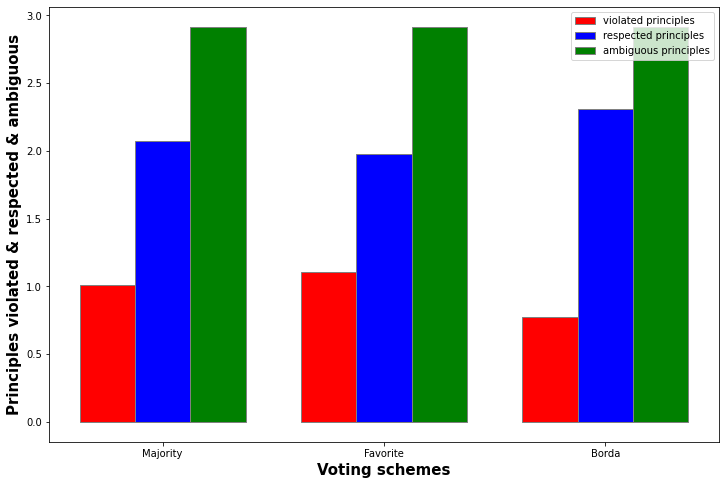

In [24]:
from scipy.stats import sem
#Individual credences
# set width of bar
barWidth = 0.25
fig = plt.subplots(figsize =(12, 8))
 
violated = [tmaj_Am, tmft_Am, tbord_Am]
respected = [tmaj_Pm, tmft_Pm, tbord_Pm]
neutral = [tmaj_Nm, tmft_Nm, tbord_Nm]

violated_se = [sem(test_society_majority['TheoriesAgainst']), sem(test_society_mft['TheoriesAgainst']), sem(test_society_borda['TheoriesAgainst'])]
respected_se = [sem(test_society_majority['TheoriesPro']), sem(test_society_mft['TheoriesPro']), sem(test_society_borda['TheoriesPro'])]
neutral_se = [sem(test_society_majority['TheoriesNeutral']), sem(test_society_mft['TheoriesNeutral']), sem(test_society_borda['TheoriesNeutral'])]
print(violated_se)
print(respected_se)
print(neutral_se)
print([0 - violated_se[0], violated_se[0]])
# violated_maj_std = [(tmaj_Am - tmaj_Astd), (tmaj_Am + tmaj_Astd)]
# respected_maj_std = [(tmaj_Pm - tmaj_Pstd), (tmaj_Pm + tmaj_Pstd)]
# neutral_maj_std = [(tmaj_Nm - tmaj_Nstd), (tmaj_Nm + tmaj_Nstd)]
# violated_mft_std = [(tmft_Am - tmft_Astd), (tmft_Am + tmft_Astd)]
# respected_mft_std = [(tmft_Pm - tmft_Pstd), (tmft_Pm + tmft_Pstd)]
# neutral_mft_std = [(tmft_Nm - tmft_Nstd), (tmft_Nm + tmft_Nstd)]
# violated_bord_std = [(tbord_Am - tbord_Astd), (tbord_Am + tbord_Astd)]
# respected_bord_std = [(tbord_Pm - tbord_Pstd), (tbord_Pm + tbord_Pstd)]
# neutral_bord_std = [(tbord_Nm - tbord_Nstd), (tbord_Nm + tbord_Nstd)]
 
# Set position of bar on X axis
br1 = np.arange(len(violated))
br3 = [x + barWidth for x in br1]
br4 = [x + 2 * barWidth for x in br1]
 
# Make the plot
plt.bar(br1, violated, color ='r', width = barWidth,
        edgecolor ='grey', label ='violated principles')
plt.bar(br3, respected, color ='b', width = barWidth,
        edgecolor ='grey', label ='respected principles')
plt.bar(br4, neutral, color ='g', width = barWidth,
       edgecolor='grey', label = 'ambiguous principles')
plt.errorbar([0,0], [0 - violated_se[0], violated_se[0]], color='black')
plt.errorbar([barWidth,barWidth], [0 - respected_se[0], respected_se[0]], color='black')
plt.errorbar([barWidth*2,barWidth*2], [0 - neutral_se[0], neutral_se[0]], color='black')
plt.errorbar([1,1], [0 - violated_se[1], violated_se[1]], color='black')
plt.errorbar([1+barWidth,1+barWidth], [0 - respected_se[1], respected_se[1]], color='black')
plt.errorbar([1+barWidth*2,1+barWidth*2],[0 - neutral_se[1], neutral_se[1]], color='black')
plt.errorbar([2,2], [0 - violated_se[2], violated_se[2]], color='black')
plt.errorbar([2+barWidth,2+barWidth], [0 - respected_se[2], respected_se[2]], color='black')
plt.errorbar([2+barWidth*2,2+barWidth*2], [0 - neutral_se[2], neutral_se[2]], color='black')
 
# Adding Xticks
plt.xlabel('Voting schemes', fontweight ='bold', fontsize = 15)
plt.ylabel('Principles violated & respected & ambiguous', fontweight ='bold', fontsize = 15)
plt.xticks([r + barWidth for r in range(len(violated))],
        ['Majority', 'Favorite', 'Borda'])
 
plt.legend()
plt.savefig("./individual", format="jpg")
plt.show()

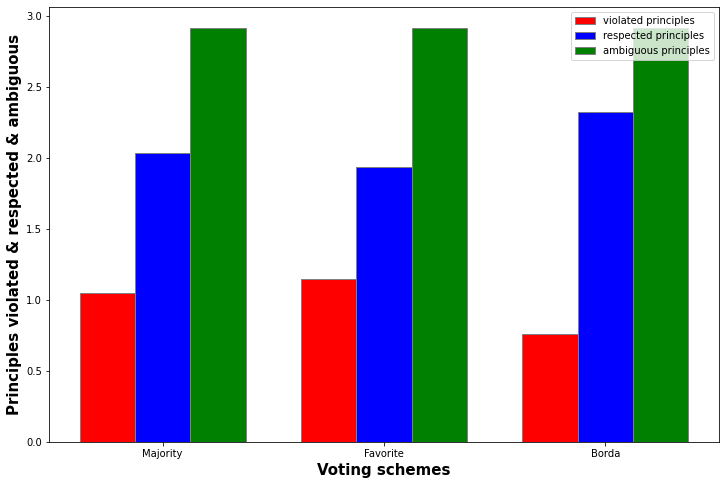

In [25]:
## Society credences
# set width of bar
barWidth = 0.25
fig = plt.subplots(figsize =(12, 8))
 
#lazy solution
violated = [tsmaj_Am, tsmft_Am, tsbord_Am]
respected = [tsmaj_Pm, tsmft_Pm, tsbord_Pm]
neutral = [tsmaj_Nm, tsmft_Nm, tsbord_Nm]

violated_se = [sem(tsmaj_Am), sem(tsmft_Am), sem(tsbord_Am)]
respected_se = [sem(tsmaj_Pm), sem(tsmft_Pm), sem(tsbord_Pm)]
neutral_se = [sem(tsmaj_Nm), sem(tsmft_Nm), sem(tsbord_Nm)]

violated_maj_std = [(tsmaj_Am - tsmaj_Astd), (tsmaj_Am + tsmaj_Astd)]
respected_maj_std = [(tsmaj_Pm - tsmaj_Pstd), (tsmaj_Pm + tsmaj_Pstd)]
neutral_maj_std = [(tsmaj_Nm - tsmaj_Nstd), (tsmaj_Nm + tsmaj_Nstd)]
violated_mft_std = [(tsmft_Am - tsmft_Astd), (tsmft_Astd + tsmft_Am)]
respected_mft_std = [(tsmft_Pm - tsmft_Pstd), (tsmft_Pm + tsmft_Pstd)]
neutral_mft_std = [(tsmft_Nm - tsmft_Nstd), (tsmft_Nm + tsmft_Nstd)]
violated_bord_std = [(tsbord_Am - tsbord_Astd), (tsbord_Am + tsbord_Astd)]
respected_bord_std = [(tsbord_Pm - tsbord_Pstd), (tsbord_Pm + tsbord_Pstd)]
neutral_bord_std = [(tsbord_Nm - tsbord_Nstd), (tsbord_Nm + tsbord_Nstd)]
    
# Set position of bar on X axis
br1 = np.arange(len(violated))
br3 = [x + barWidth for x in br1]
br4 = [x + 2 * barWidth for x in br1]
 
# Make the plot
plt.bar(br1, violated, color ='r', width = barWidth,
        edgecolor ='grey', label ='violated principles')
plt.bar(br3, respected, color ='b', width = barWidth,
        edgecolor ='grey', label ='respected principles')
plt.bar(br4, neutral, color ='g', width = barWidth,
       edgecolor='grey', label = 'ambiguous principles')
plt.errorbar([0,0], [0 - violated_se[0], violated_se[0]], color='black')
plt.errorbar([barWidth,barWidth], [0 - respected_se[0], respected_se[0]], color='black')
plt.errorbar([barWidth*2,barWidth*2], [0 - neutral_se[0], neutral_se[0]], color='black')
plt.errorbar([1,1], [0 - violated_se[1], violated_se[1]], color='black')
plt.errorbar([1+barWidth,1+barWidth], [0 - respected_se[1], respected_se[1]], color='black')
plt.errorbar([1+barWidth*2,1+barWidth*2],[0 - neutral_se[1], neutral_se[1]], color='black')
plt.errorbar([2,2], [0 - violated_se[2], violated_se[2]], color='black')
plt.errorbar([2+barWidth,2+barWidth], [0 - respected_se[2], respected_se[2]], color='black')
plt.errorbar([2+barWidth*2,2+barWidth*2], [0 - neutral_se[2], neutral_se[2]], color='black')
 
 
# Adding Xticks
plt.xlabel('Voting schemes', fontweight ='bold', fontsize = 15)
plt.ylabel('Principles violated & respected & ambiguous', fontweight ='bold', fontsize = 15)
plt.xticks([r + barWidth for r in range(len(violated))],
        ['Majority', 'Favorite', 'Borda'])

 
plt.legend()
plt.savefig("./societal", format="jpg")
plt.show()

#Get more informative graphs -> That would help (violinplots)
#Ranking? then we can give X% of the cases Borda respects more principles
#Kendall tau distance - ranking between two different methods, give you the p-value (what is the likelihood that the first one is better than the second one)

